In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import pymn
import matplotlib
import scipy.stats
import itertools
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.settings.verbosity = 3

In [2]:
def read_in_sunil_formated_data(
    file_name,
    file_location="/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/2024_update/Inflo_vs_root",
    counts=False,
):
    """Take in data from Sunil - formatted as 3 files with the same prefix

    Args:
        file_name (str): prefix of the 3 file
        file_location (str, optional): folder files are in. Defaults to '/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/Project_2_across_roots'.
        counts (boolean,optional): Whether to return the raw counts or the corrected. When False returns corrected data. Defaults to False
    Raises:
        Exception: _description_
        Exception: _description_
        Exception: _description_

    Returns:
        anndata: Either the counts or the corrected anndata
    """
    base_file_name = file_name
    file_location = file_location
    counts_file = file_location + "/" + base_file_name + "_counts.csv"
    counts_pd = pd.read_csv(counts_file, index_col=0)
    counts_pd = counts_pd.T

    corrected_file = file_location + "/" + base_file_name + "_data.csv"
    corrected_pd = pd.read_csv(corrected_file, index_col=0)
    corrected_pd = corrected_pd.T

    meta_file = file_location + "/" + base_file_name + "_meta.csv"
    meta_pd = pd.read_csv(meta_file, index_col=0)

    if all(meta_pd.index == counts_pd.index) == False:
        raise Exception("Meta data doesn't match counts index")
    if all(meta_pd.index == corrected_pd.index) == False:
        raise Exception("Meta data doesn't match corrected index")
    if all(counts_pd.index == corrected_pd.index) == False:
        raise Exception("Counts doesn't match corrected data")

    counts_anndata = ad.AnnData(X=counts_pd.values)
    counts_anndata.var.index = counts_pd.columns
    counts_anndata.obs = meta_pd

    corrected_anndata = ad.AnnData(X=corrected_pd.values)
    corrected_anndata.var.index = corrected_pd.columns
    corrected_anndata.obs = meta_pd

    if counts == False:
        return corrected_anndata
    if counts:
        return counts_anndata

In [3]:
# shoot_data = read_in_sunil_formated_data('inflo_rename')
# root_data = read_in_sunil_formated_data('root_rename')

# integrated_data = read_in_sunil_formated_data('root_inflo')
# merged_unintegrated_data =ad.concat(adatas = [shoot_data,root_data], label = "Source Tissue", keys = ['Shoot','Root'])

# merged_unintegrated_data.obs['Barcode'] = merged_unintegrated_data.obs.index 
# merged_unintegrated_data.obs['Barcode'] = merged_unintegrated_data.obs['Barcode'].str.split('_').str[0]

# integrated_data.obs['Barcode'] = integrated_data.obs.index 
# integrated_data.obs['Barcode'] = integrated_data.obs['Barcode'].str.split('_').str[0]

# intermediary_file = integrated_data.obs.reset_index().merge(how = 'inner', right = merged_unintegrated_data.obs[['orig.ident','Barcode','CellType']], on= ['orig.ident','Barcode'] , )

# intermediary_file = intermediary_file.set_index('index')
# integrated_data.obs = intermediary_file
# integrated_data.write('/data/passala/Generated_Tables/Sunil_root_shoot_project/Anndata_storage/integrated_root_shoot.h5ad')
# merged_unintegrated_data.write('/data/passala/Generated_Tables/Sunil_root_shoot_project/Anndata_storage/unintegrated_merged_root_shoot.h5ad')

In [4]:
integrated_data = ad.read_h5ad('/data/passala/Generated_Tables/Sunil_root_shoot_project/Anndata_storage/integrated_root_shoot.h5ad')
merged_unintegrated_data = ad.read_h5ad('/data/passala/Generated_Tables/Sunil_root_shoot_project/Anndata_storage/unintegrated_merged_root_shoot.h5ad')


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [5]:
root_cracked  = integrated_data[integrated_data.obs['orig.ident2'] == 'root', :].copy()
shoot_cracked = integrated_data[integrated_data.obs['orig.ident2'] == 'inflo', :].copy()

In [6]:
root_cracked.obs

,orig.ident,nCount_RNA,nFeature_RNA,integrated_snn_res.0.5,seurat_clusters,integrated_snn_res.0.6,integrated_snn_res.0.7,orig.ident2,Barcode,CellType
index,,,,,,,,,,
AAACCTGAGAGCTTCT_4,Root1,9088,3607,2,18,15,18,root,AAACCTGAGAGCTTCT,11_cortex
AAACCTGAGTGATCGG_4,Root1,12642,3884,3,3,5,3,root,AAACCTGAGTGATCGG,5_pericycle/stele
AAACCTGCACGGCGTT_4,Root1,5220,2689,17,20,20,20,root,AAACCTGCACGGCGTT,5_pericycle/stele
AAACCTGCACTGTCGG_4,Root1,21468,5019,1,0,0,0,root,AAACCTGCACTGTCGG,2_cortex
AAACCTGGTGTGAAAT_4,Root1,18546,4701,2,1,2,1,root,AAACCTGGTGTGAAAT,16_cortex-epidermis
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGGTTTACC_9,Root9,4756,2317,0,2,1,2,root,TTTGGTTAGGTTTACC,13_epidermis
TTTGTTGCAGTCAGTT_9,Root9,19949,4231,12,15,11,15,root,TTTGTTGCAGTCAGTT,6_phloem
TTTGTTGCATTGACTG_9,Root9,33151,6570,3,3,5,3,root,TTTGTTGCATTGACTG,7_pericycle


In [7]:
psuedobulk_df_root = pd.DataFrame(index = root_cracked.var_names)## Make a base dataframe index we will add stuff on to later
all_samples = list(root_cracked.obs.CellType.unique())  ## get list of clusters to loop through
psuedobulk_df_root

""
Zm00001eb026490
Zm00001eb056070
Zm00001eb055450
Zm00001eb053570
Zm00001eb004770
...
Zm00001eb426870
Zm00001eb413570
Zm00001eb416910
Zm00001eb438410


In [8]:
for batch_type in all_samples:

    ## Read in the Names so our code is easy to understand
    current_cluster = batch_type

    ## Calculate the Psuedobulked mean
    cells_matching_batch_and_cluster = root_cracked[root_cracked.obs['CellType'] == current_cluster ]
    mean_of_genes = cells_matching_batch_and_cluster.X.mean(axis = 0).tolist()


    name_of_combo = current_cluster
    psuedobulk_df_root[name_of_combo] = mean_of_genes

In [9]:
psuedobulk_df_root.max()

11_cortex              4.764408
5_pericycle/stele      4.407593
2_cortex               4.923476
16_cortex-epidermis    4.645265
10_epidermis           4.787265
9_cortex               4.765960
19_cortex/stele        4.178545
18_pericycle/stele     4.847895
13_epidermis           4.437058
21_G2M-epidermis       4.835828
0_stele                4.226370
6_phloem               4.384880
15_cortex-epidermis    4.423465
14_stele/xylem         4.574511
20_xylem               4.305381
7_pericycle            4.701887
1_cortex               4.876408
8_endodermis           4.517355
3_endodermis           4.595390
22_columella           5.319226
17_cortex              4.980187
4_                     4.531604
12_phloem              3.903533
dtype: float64

In [10]:
shoot_cracked

AnnData object with n_obs × n_vars = 13335 × 29779
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.0.5', 'seurat_clusters', 'integrated_snn_res.0.6', 'integrated_snn_res.0.7', 'orig.ident2', 'Barcode', 'CellType'

In [11]:
psuedobulk_df_shoot = pd.DataFrame(index = shoot_cracked.var_names)## Make a base dataframe index we will add stuff on to later
all_samples = list(shoot_cracked.obs.CellType.unique())  ## get list of clusters to loop through

for batch_type in all_samples:

    ## Read in the Names so our code is easy to understand
    current_cluster = batch_type

    ## Calculate the Psuedobulked mean
    cells_matching_batch_and_cluster = shoot_cracked[shoot_cracked.obs['CellType'] == current_cluster ]
    mean_of_genes = cells_matching_batch_and_cluster.X.mean(axis = 0).tolist()


    name_of_combo = current_cluster
    psuedobulk_df_shoot[name_of_combo] = mean_of_genes

In [12]:
results_df = pd.DataFrame(index = psuedobulk_df_root.index, columns = ['T Statistic','P Value Uncorrected'] )
for gene in results_df.index:
    current_root_samples = psuedobulk_df_root.loc[gene]
    list_root_samples = current_root_samples[current_root_samples != 0].to_list()
    if len(list_root_samples) == 0:
        continue
    current_shoot_samples = psuedobulk_df_shoot.loc[gene]
    list_shoot_samples = current_shoot_samples[current_shoot_samples != 0].to_list()
    if len(list_shoot_samples) == 0:
        continue
    current_result = scipy.stats.ttest_ind(a = list_root_samples, b = list_root_samples,)
    results_df.loc[gene,'T Statistic'] = current_result[0]
    results_df.loc[gene,'P Value Uncorrected'] = current_result[1]


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [13]:
results_df = pd.DataFrame(index = psuedobulk_df_root.index, columns = ['T Statistic','P Value Uncorrected'] )
for gene in results_df.index:
    current_root_samples = psuedobulk_df_root.loc[gene]
    list_root_samples = current_root_samples.to_list()
    if len(list_root_samples) == 0:
        continue
    current_shoot_samples = psuedobulk_df_shoot.loc[gene]
    list_shoot_samples = current_shoot_samples.to_list()
    if len(list_shoot_samples) == 0:
        continue
    current_result = scipy.stats.ttest_ind(a = list_root_samples, b = list_root_samples,)
    results_df.loc[gene,'T Statistic'] = current_result[0]
    results_df.loc[gene,'P Value Uncorrected'] = current_result[1]

In [14]:
results_df.min()

T Statistic            0.0
P Value Uncorrected    1.0
dtype: object

In [15]:
results_df['P Value Uncorrected'].unique()

array([1.0, nan, nan, ..., nan, nan, nan], dtype=object)

In [16]:
results_df

,T Statistic,P Value Uncorrected
Zm00001eb026490,0.0,1.0
Zm00001eb056070,0.0,1.0
Zm00001eb055450,0.0,1.0
Zm00001eb053570,0.0,1.0
Zm00001eb004770,0.0,1.0
...,...,...
Zm00001eb426870,0.0,1.0
Zm00001eb413570,0.0,1.0
Zm00001eb416910,0.0,1.0
Zm00001eb438410,0.0,1.0


In [17]:
current_result[0]

0.0

In [18]:
current_root_samples[current_root_samples != 0].to_list()

[0.0002521756978239864, 0.00024202790518756956, 0.00021689364803023636]

In [21]:
integrated_data.obs['orig.ident2'] = integrated_data.obs['orig.ident2'].astype(str)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


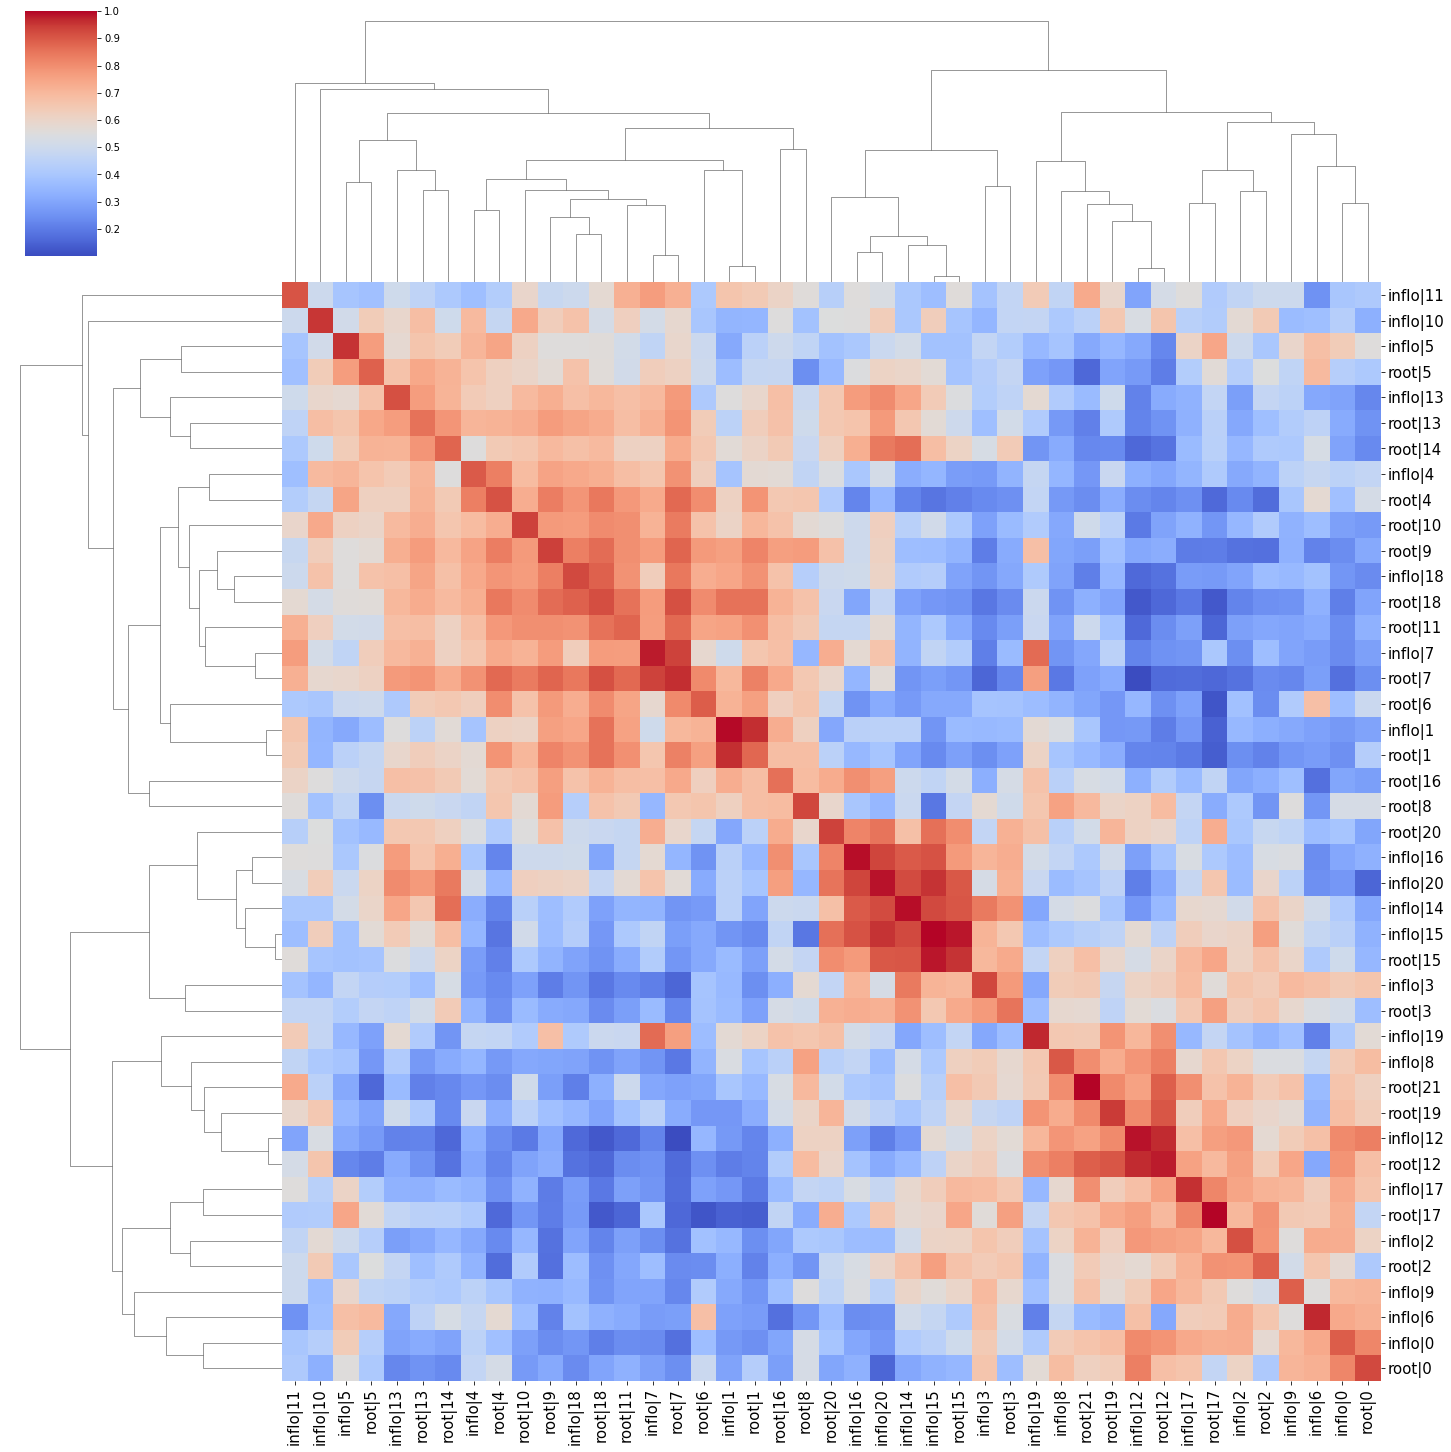

In [24]:
pymn.variableGenes(integrated_data, study_col='orig.ident2')
pymn.MetaNeighborUS(integrated_data, study_col='orig.ident2',
                    ct_col='seurat_clusters', fast_version=True)
g = pymn.plotMetaNeighborUS(integrated_data, figsize=(
    20, 20), fontsize=15, show=False, cmap='coolwarm', cbar_pos=(0.02, 0.82, 0.05, 0.17))
g.savefig('/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/2024_update/Plots/integrated_root_shoot_metaneighbor.svg')

In [29]:
merged_unintegrated_data.obs['Source Tissue'] = merged_unintegrated_data.obs['Source Tissue'].astype(str)
merged_unintegrated_data.obs['CellType'] = merged_unintegrated_data.obs['CellType'].astype(str)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


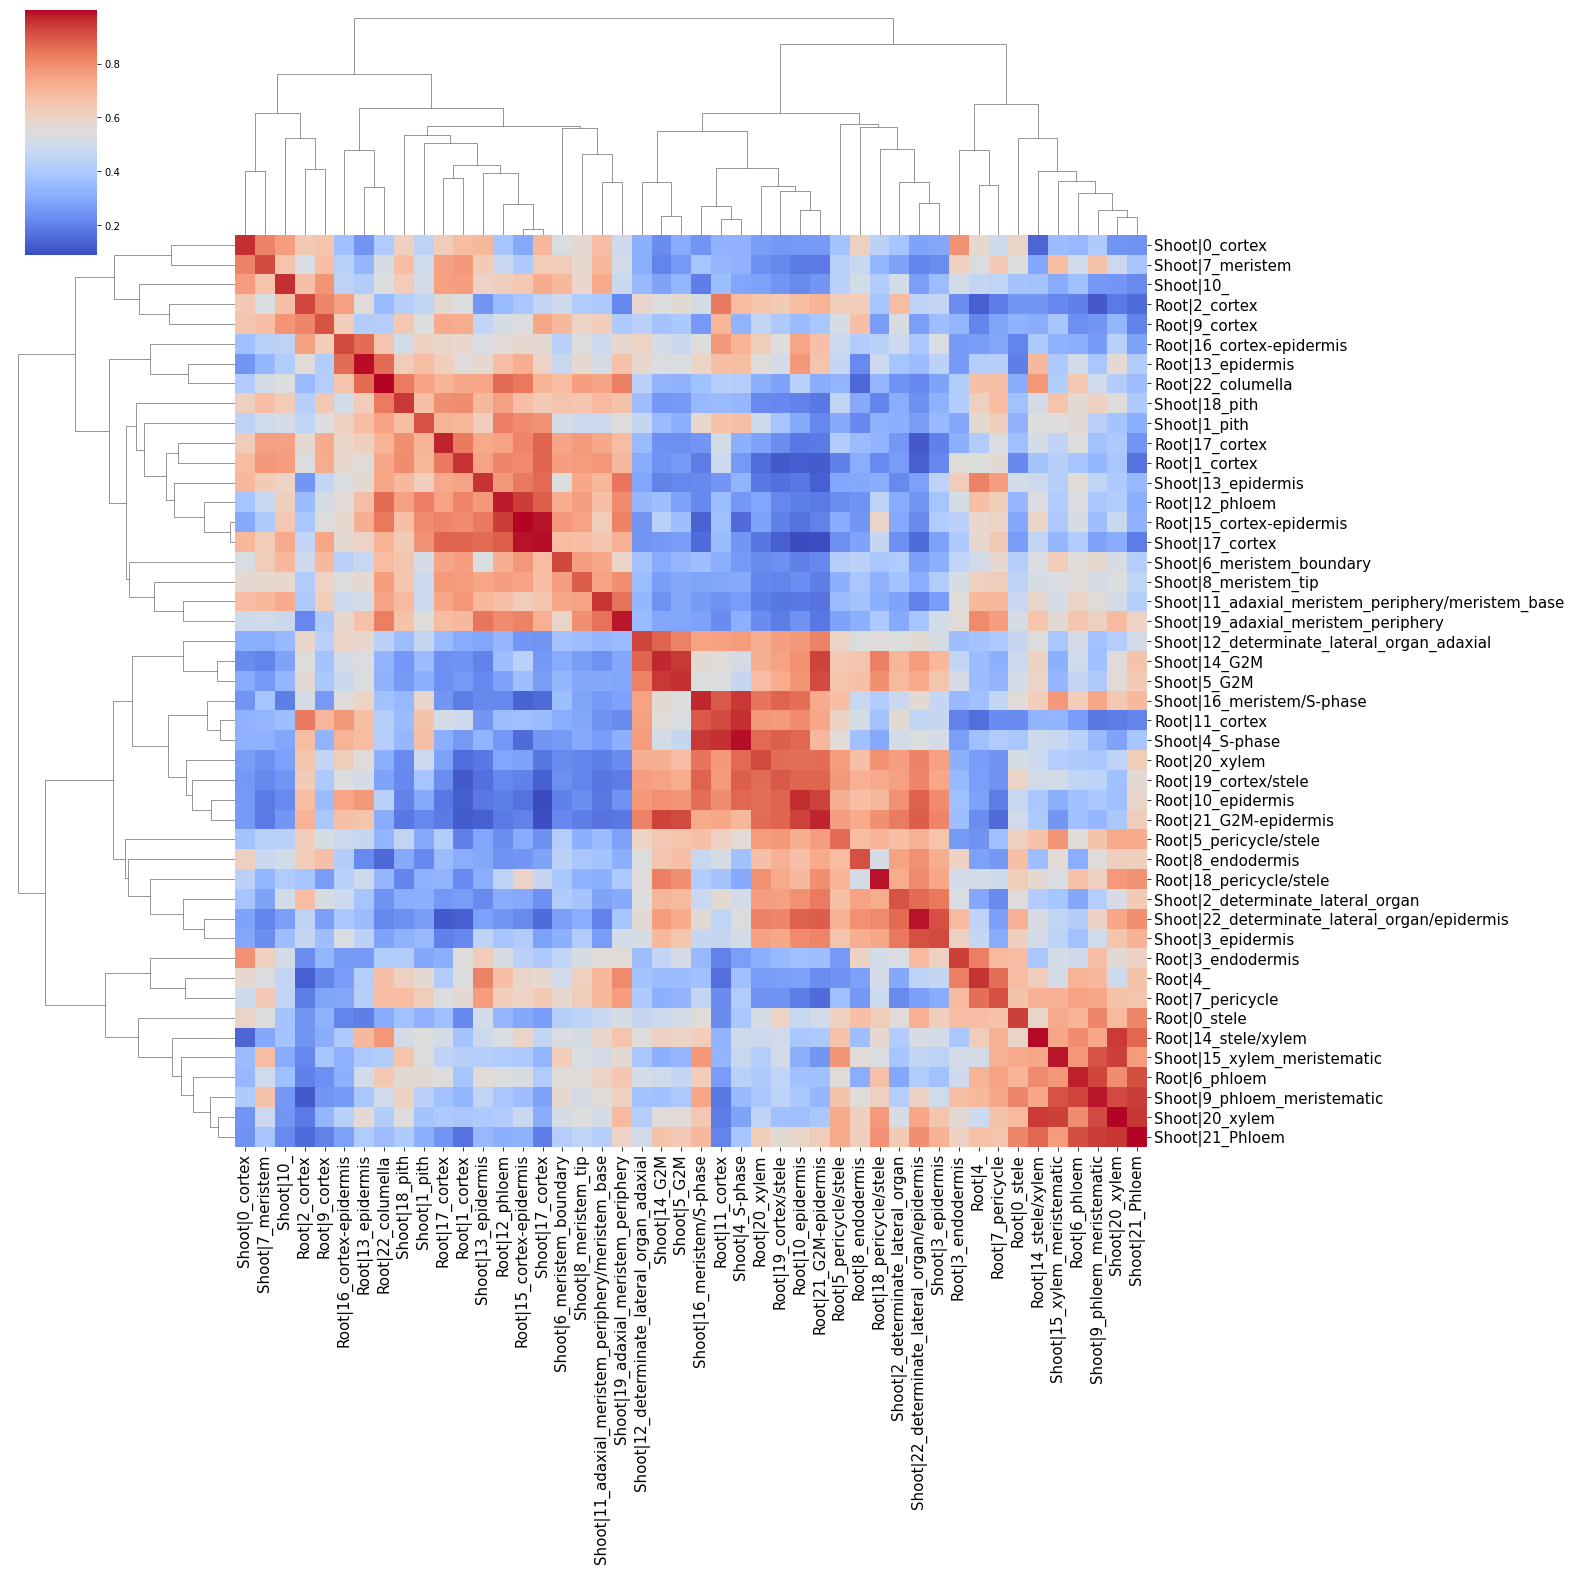

In [30]:
pymn.variableGenes(merged_unintegrated_data, study_col='Source Tissue')
pymn.MetaNeighborUS(merged_unintegrated_data, study_col='Source Tissue',
                    ct_col='CellType', fast_version=True)
g = pymn.plotMetaNeighborUS(merged_unintegrated_data, figsize=(
    20, 20), fontsize=15, show=False, cmap='coolwarm', cbar_pos=(0.02, 0.82, 0.05, 0.17))
g.savefig('/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/2024_update/Plots/un_integrated_root_shoot_metaneighbor.svg')